# 1. Management of The Capital Bikeshare Dataset 

## 1.1 Importing Necessary Libraries

In [143]:
import os 
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import time
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder,Binarizer
from turtle import color
from turtle import width

## 1.2 Importing The Dataset and Arranging

In [144]:
data = pd.read_csv('./Bike-Sharing-Dataset/hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Checking data integrity
This is a good aproach when we have a big data set to ensure that data has all values and we are not working with inconclusive data.  

In [145]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Checking if the data has duplicated values

In [146]:
data.duplicated().sum()

0

In [147]:
data['actual_temp'] = (data['temp'] * 47) - 8 
data.drop('temp', axis=1, inplace=True)

data['actual_windspeed'] = (data['windspeed'] * 67) 
data.drop('windspeed', axis=1, inplace=True)
data.head(3500)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,casual,registered,cnt,actual_temp,actual_windspeed
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.2879,0.81,3,13,16,3.28,0.0000
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.2727,0.80,8,32,40,2.34,0.0000
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.2727,0.80,5,27,32,2.34,0.0000
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.2879,0.75,3,10,13,3.28,0.0000
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.2879,0.75,0,1,1,3.28,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3496,2011-05-30,2,0,5,13,1,1,0,1,0.7879,0.44,133,217,350,32.42,6.0032
3496,3497,2011-05-30,2,0,5,14,1,1,0,1,0.8030,0.39,142,185,327,33.36,0.0000
3497,3498,2011-05-30,2,0,5,15,1,1,0,1,0.8030,0.39,132,179,311,33.36,16.9979
3498,3499,2011-05-30,2,0,5,16,1,1,0,1,0.7879,0.37,101,208,309,33.36,19.0012


In [148]:
data['dteday'] = pd.to_datetime(data['dteday'],infer_datetime_format=True) #to convert date from object to date
data.rename(columns= {'instant':'id',
                        'dteday':'date',
                        'weathersit':'weather',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_rental',
                        'atemp':'feeling_temp',
                        'hr':'hour',
                        'yr':'year',
                        'actual_windspeed':'windspeed',
                        'actual_temp':'temperature'},inplace=True)



# 2. Exploratory Data Analysis

## 2.1. Overall Insight

In [149]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            17379 non-null  int64         
 1   date          17379 non-null  datetime64[ns]
 2   season        17379 non-null  int64         
 3   year          17379 non-null  int64         
 4   month         17379 non-null  int64         
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  int64         
 7   weekday       17379 non-null  int64         
 8   workingday    17379 non-null  int64         
 9   weather       17379 non-null  int64         
 10  feeling_temp  17379 non-null  float64       
 11  humidity      17379 non-null  float64       
 12  casual        17379 non-null  int64         
 13  registered    17379 non-null  int64         
 14  total_rental  17379 non-null  int64         
 15  temperature   17379 non-null  float6

,id,season,year,month,hour,holiday,weekday,workingday,weather,feeling_temp,humidity,casual,registered,total_rental,temperature,windspeed
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.475775,0.627229,35.676218,153.786869,189.463088,15.358397,12.736540
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.171850,0.192930,49.305030,151.357286,181.387599,9.050138,8.196795
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.060000,0.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.333300,0.480000,4.000000,34.000000,40.000000,7.980000,7.001500
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.484800,0.630000,17.000000,115.000000,142.000000,15.500000,12.998000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.621200,0.780000,48.000000,220.000000,281.000000,23.020000,16.997900
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,367.000000,886.000000,977.000000,39.000000,56.996900


## 2.2. Effect of The Season 

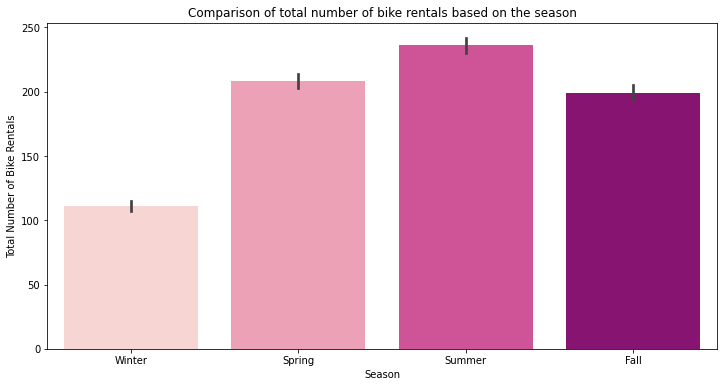

In [164]:
plt.figure(figsize=(12,6))
seasons = sns.barplot(data=data, x="season", y="total_rental", color = 'deepskyblue',palette='RdPu') 
seasons.set (title="Comparison of total number of bike rentals based on the season", xlabel='Season', 
            xticklabels = ['Winter','Spring','Summer','Fall'],ylabel= 'Total Number of Bike Rentals')
plt.show() 

- The highest number of rental bikes is in summer, as summer is a holiday season, weather conditions are good for a bike trip.
- It follows as spring, fall and winter respectively as the weather conditions of these seasons start getting worse with the same order as well. 

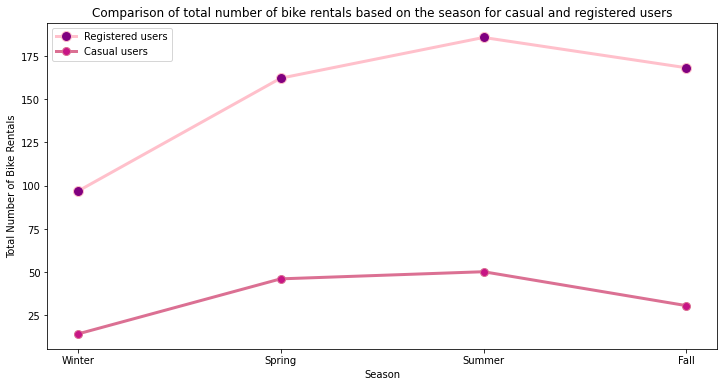

In [151]:
season_reg = data.groupby(['season'])['registered'].mean()
season_cas = data.groupby(['season'])['casual'].mean()
fig, axes= plt.subplots(figsize=(12, 6))
season_reg.plot(kind = 'line', marker='o',  color='pink', markerfacecolor='purple', markersize=10, linewidth=3)
season_cas.plot(kind = 'line',marker = 'o', color = 'palevioletred', markerfacecolor='mediumvioletred', markersize=8,linewidth=3)
plt.title('Comparison of total number of bike rentals based on the season for casual and registered users')
plt.xlabel('Season')
plt.ylabel('Total Number of Bike Rentals')
tick_val=[1,2,3,4]
tick_lab=['Winter','Spring','Summer','Fall']
plt.setp(axes, xticks=tick_val, xticklabels=tick_lab)
plt.legend(['Registered users','Casual users'])
plt.show()

- The number of bike rentals from registered users increases and stay around the highest value during the summer season and decreases afterwards. As registered users are mostly regular users that ride a bike to go places on daily basis such as social activities, work, school etc., season affects their decision making as in winter times the weather might be not suitable for a bike ride which has the lowest value on the graph. 
- Same trend appear also in casual users who are mostly tourists or people who live in Washington and use bike rental system very occasionally. Season affects casul users decision as well. Tourists would prefer having a trip when the weather is better so that they can visit Washington and rent a bike for travelling around. Local people would also prefer riding a bike more when the weather is suitable which are the summer and spring seasons.  


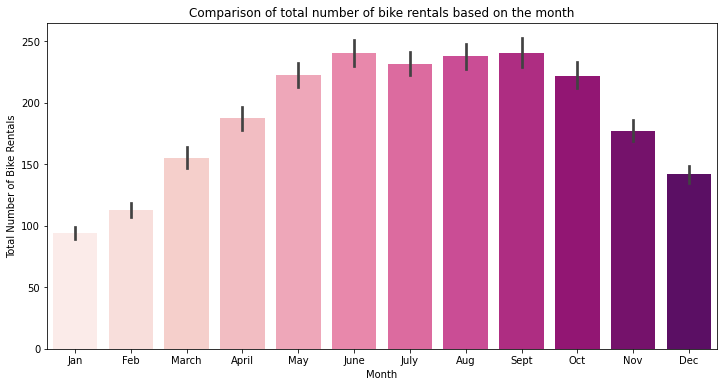

In [165]:
plt.figure(figsize=(12,6))
months = sns.barplot(data=data, x='month', y='total_rental', palette = 'RdPu')
months.set (title="Comparison of total number of bike rentals based on the month", xlabel='Month',
            xticklabels = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], 
            ylabel= 'Total Number of Bike Rentals')
plt.show() 

The figure indicates that total number of bike rentals reaches to the highest value in summer months (June, July and August) as we already observed in ***Total rental bikes vs Season*** graph. Therefore, the variation of rental bikes based on the months is very similar to the seasons. 

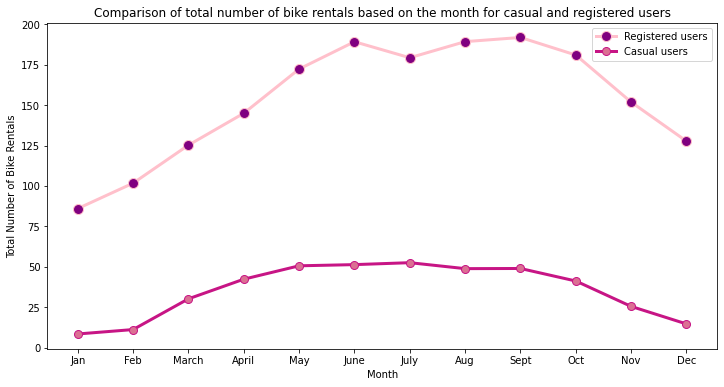

In [153]:
month_reg = data.groupby(['month'])['registered'].mean()
month_cas = data.groupby(['month'])['casual'].mean()
fig, axes= plt.subplots(figsize=(12, 6))
month_reg.plot(kind = 'line', marker='o', markerfacecolor='purple', markersize=10, color='pink', linewidth=3)
month_cas.plot(kind = 'line',marker = 'o', color = 'mediumvioletred', markerfacecolor='palevioletred', markersize=8,linewidth=3)
plt.title('Comparison of total number of bike rentals based on the month for casual and registered users')
plt.xlabel('Month')
plt.ylabel('Total Number of Bike Rentals')
tick_val=[1,2,3,4,5,6,7,8,9,10,11,12]
tick_lab=['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.setp(axes, xticks=tick_val, xticklabels=tick_lab)
plt.legend(['Registered users','Casual users'])
plt.show()

- As observed from ***Total rental bikes vs Season*** graph, number of both registered and casual users increases from February on, as the weather condition starts getting better, people starts renting a bike more. 
- July has the highest value for casual users while registered users have a decrease in that month. 
    - Because, July is usually the month where the schools have summer break and the workforce take holidays. Therefore, we see a drop in the registered users for July as those local people are leaving the Washington DC while there is a little increase for casual users and actually it reaches to the highest valur throughout the year as tourists are coming to Washing DC for same reason and mostly prefering rental bikes for travelling around. 

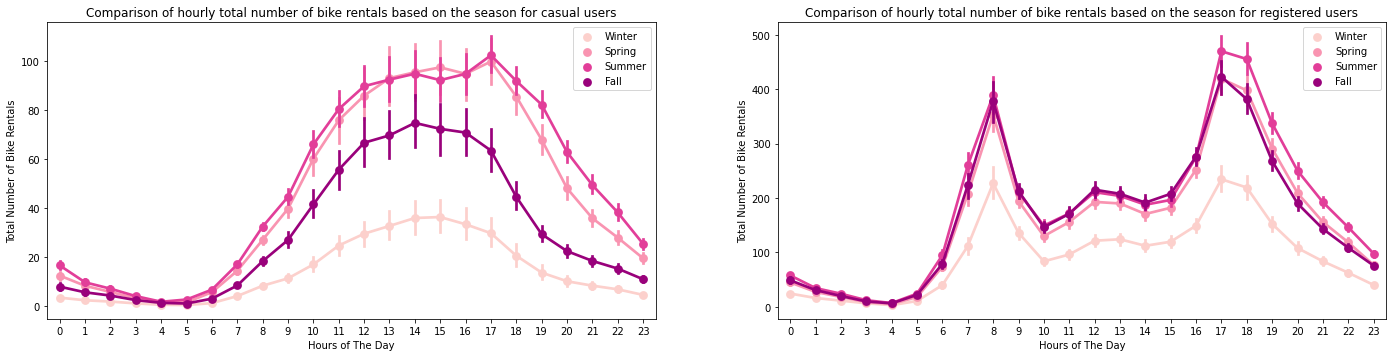

In [154]:
plt.figure(figsize=(24,12))
plt.subplot(2, 2, 1)
season_hours_cas = sns.pointplot(x='hour', y='casual', data=data, hue='season', palette="RdPu")
season_hours_cas.set_title('Comparison of hourly total number of bike rentals based on the season for casual users')
plt.xlabel('Hours of The Day')
plt.ylabel('Total Number of Bike Rentals')
legend_handle = season_hours_cas.get_legend_handles_labels()[0]
season_hours_cas.legend(legend_handle, ['Winter','Spring','Summer','Fall'])

plt.subplot(2, 2, 2)
season_hours_reg = sns.pointplot(x='hour', y='registered', data=data, hue='season', palette="RdPu")
season_hours_reg.set_title('Comparison of hourly total number of bike rentals based on the season for registered users')
plt.xlabel('Hours of The Day')
plt.ylabel('Total Number of Bike Rentals')
legend_handle = season_hours_reg.get_legend_handles_labels()[0]
season_hours_reg.legend(legend_handle, ['Winter','Spring','Summer','Fall'])
plt.show()

- Hourly total number of bike rental for casual users show that they are most active during the afternoon hours (11am - 6 pm), so they mostly use bike rentals for recreation purposes.
- Hourly total number of bike rental for registered users show that ridership pattern is mostly office-commuter oriented as the demand is high during peak morning hours (7 am - 9 am) and evening hours(5 pm - 7pm).

## 2.3. Effect of The Weather Condition 

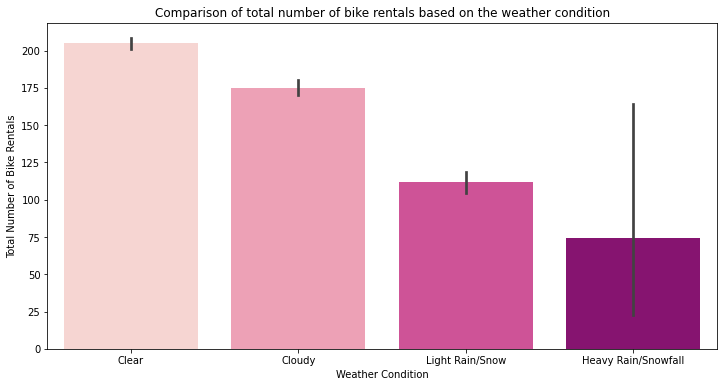

In [166]:
plt.figure(figsize=(12,6))
weather = sns.barplot(data=data, x='weather', y='total_rental', palette = 'RdPu')
weather.set (title="Comparison of total number of bike rentals based on the weather condition", 
            xlabel='Weather Condition',xticklabels = ['Clear', 'Cloudy', 'Light Rain/Snow','Heavy Rain/Snowfall'], 
            ylabel= 'Total Number of Bike Rentals')
plt.show() 

As mentioned earlier, one of the factors that affects the total number of rental bikes is the weather condition. The graph above shows that clear weather has the highest value as expected, since clear weather is the best condition for a biker. After that, the values from high to low follows as cloudy which could indicate weather conditions in spring in Washington DC, light rain/snow as it might be in fall and eventually Heavy Rain/Snowfall in winter. 

Note: The reason that Heavy Rain/Snowfall has a very big confidence interval is that it has very small sample size. To make the confidence interval smaller, sample size should be larger. 

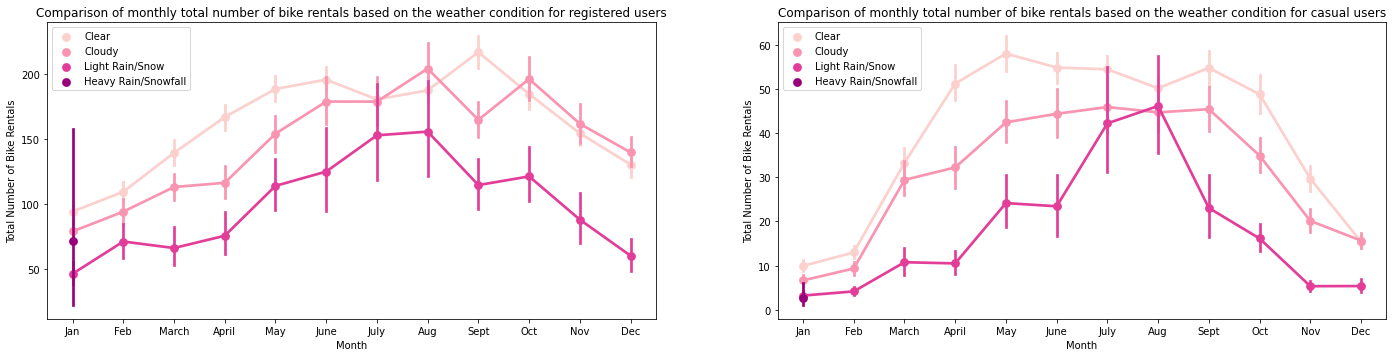

In [156]:
plt.figure(figsize=(24,12))
plt.subplot(2, 2, 1)
weather_monthly_reg = sns.pointplot(x='month', y='registered', data=data, hue='weather', palette="RdPu")
weather_monthly_reg.set_title('Comparison of monthly total number of bike rentals based on the weather condition for registered users')
plt.xlabel('Month')
plt.ylabel('Total Number of Bike Rentals')
legend_handle = weather_monthly_reg.get_legend_handles_labels()[0]
weather_monthly_reg.legend(legend_handle, ['Clear', 'Cloudy', 'Light Rain/Snow','Heavy Rain/Snowfall'])
weather_monthly_reg.set_xticklabels(['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'])

plt.subplot(2, 2, 2)
weather_monthly_cas = sns.pointplot(x='month', y='casual', data=data, hue='weather', palette="RdPu")
weather_monthly_cas.set_title('Comparison of monthly total number of bike rentals based on the weather condition for casual users')
plt.xlabel('Month')
plt.ylabel('Total Number of Bike Rentals')
legend_handle = weather_monthly_cas.get_legend_handles_labels()[0]
weather_monthly_cas.legend(legend_handle, ['Clear', 'Cloudy', 'Light Rain/Snow','Heavy Rain/Snowfall'])
weather_monthly_cas.set_xticklabels(['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.show()

***Comparison of monthly total number of bike rentals based on the weather condition for registered users*** graph shows that registered users has an increase throughout the year from winter to summer, as the weather conditions get better. Also, we can see that the better the weather condition (e.g. Clear), the higher number of users (e.g. compared to Light Rain/Snow)

***Comparison of monthly total number of bike rentals based on the weather condition for casual users*** graph shows that casual users follow the same trend that the better the weather condition, the more bike rentals. However, casual users are way less compared to registered users. 

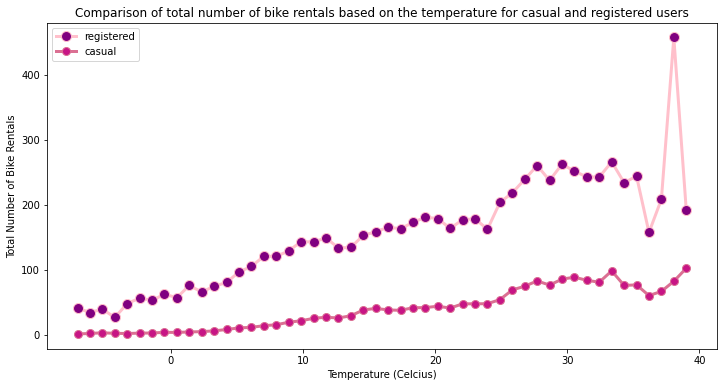

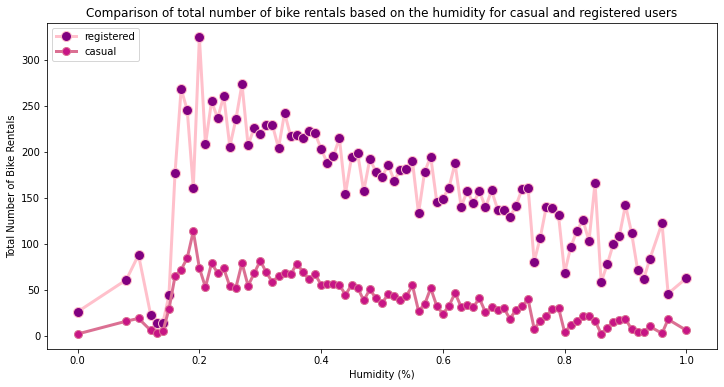

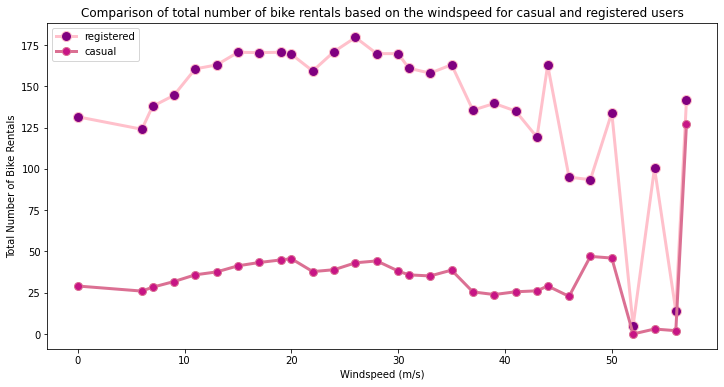

In [157]:
temperature_reg = data.groupby(['temperature'])['registered'].mean()
temperature_cas = data.groupby(['temperature'])['casual'].mean()
fig, axes= plt.subplots(figsize=(12, 6))
temperature_reg.plot(kind = 'line', marker='o', markerfacecolor='purple', markersize=10, color='pink', linewidth=3)
temperature_cas.plot(kind = 'line',marker = 'o', color = 'palevioletred', markerfacecolor='mediumvioletred', markersize=8,linewidth=3)
plt.title('Comparison of total number of bike rentals based on the temperature for casual and registered users')
plt.legend(loc='upper left')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Total Number of Bike Rentals')
plt.show()


humidity_reg = data.groupby(['humidity'])['registered'].mean()
humidity_cas = data.groupby(['humidity'])['casual'].mean()
fig, axes= plt.subplots(figsize=(12, 6))
humidity_reg.plot(kind = 'line', marker='o', markerfacecolor='purple', markersize=10, color='pink', linewidth=3)
humidity_cas.plot(kind = 'line',marker = 'o', color = 'palevioletred', markerfacecolor='mediumvioletred', markersize=8,linewidth=3)
plt.title('Comparison of total number of bike rentals based on the humidity for casual and registered users')
plt.legend(loc='upper left')
plt.xlabel('Humidity (%)')
plt.ylabel('Total Number of Bike Rentals')
plt.show()


windspeed_reg = data.groupby(['windspeed'])['registered'].mean()
windspeed_cas = data.groupby(['windspeed'])['casual'].mean()
fig, axes= plt.subplots(figsize=(12, 6))
windspeed_reg.plot(kind = 'line', marker='o', markerfacecolor='purple', markersize=10, color='pink', linewidth=3)
windspeed_cas.plot(kind = 'line',marker = 'o', color = 'palevioletred', markerfacecolor='mediumvioletred', markersize=8,linewidth=3)
plt.title('Comparison of total number of bike rentals based on the windspeed for casual and registered users')
plt.legend(loc='upper left')
plt.xlabel('Windspeed (m/s)')
plt.ylabel('Total Number of Bike Rentals')
plt.show()


As weather conditions affect the number of rental bikes, temperature, humidity and windspeed also have impact on the values. 

- For both users, the higher the temperature the more number of bike rentals observed as warmer weather let people do outdoor activities more. 

- Humidity graph suggests that around 20% humidity is the best case for both users. When the humidity level gets higher, the number of rental bikes starts decreasing. When, the humidity is very high e.g. around 90 to 100 %, people seem to prefer using not a rental bike service so often, most probably public transport as they have usually air conditioners or staying at their home. 

- Windspeed affect the decision if riding a bike, therefore it also has an impact on using rental bike service. Higher the wind speed, the less number of rental bikes as it gets more difficult to ride a bike under the strong windspeed condition. 

## 2.4. Effect of the Day Type

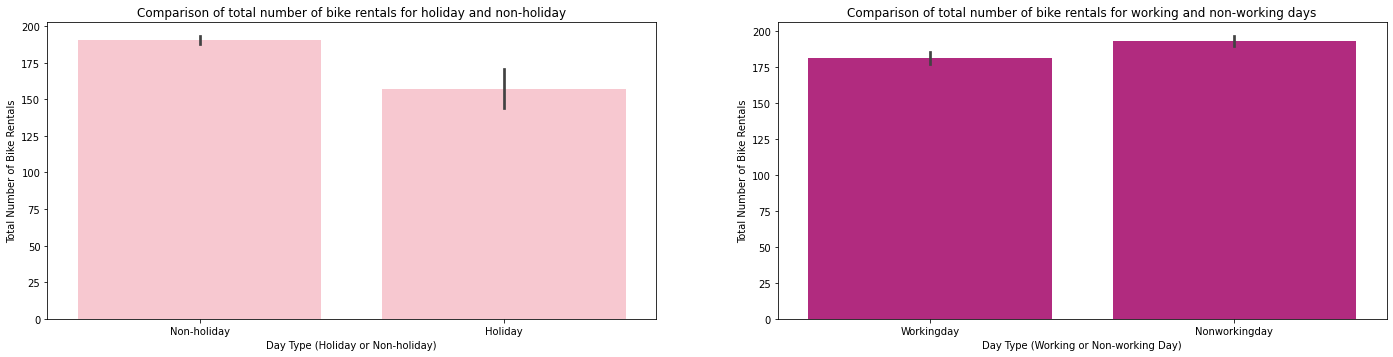

In [167]:
plt.figure(figsize=(24,12))
plt.subplot(2, 2, 1)
holiday = sns.barplot(data=data, x='holiday', y='total_rental', color = 'pink')
holiday.set (title="Comparison of total number of bike rentals for holiday and non-holiday", 
            xlabel='Day Type (Holiday or Non-holiday)', xticklabels = ['Non-holiday','Holiday'],
            ylabel= 'Total Number of Bike Rentals')

plt.subplot(2, 2, 2)
workingdays = sns.barplot(data=data, x='workingday', y='total_rental', color = 'mediumvioletred')
workingdays.set(xlabel ="Day Type (Working or Non-working Day)", ylabel = "Total Number of Bike Rentals", 
                title ='Comparison of total number of bike rentals for working and non-working days',
                xticklabels = (['Workingday','Nonworkingday']))
plt.show() 

- The data suggests that less people are using the rental bike service on a holiday compared to non-holiday as people tend to stay at home with the family during the holiday. When when it is not a holiday,people, especially the local people would be out and go to places like office, school etc.

- The number of rental bikes are higher in non-workingdays compared to working days as expected. People would do outdoor activities such as renting a bike more when it is not a working day. The number of rental bikes in working days might indicate the regular users that go to school, work etc. This can be analyzed more in detail by looking at the values for casual and registered users. 

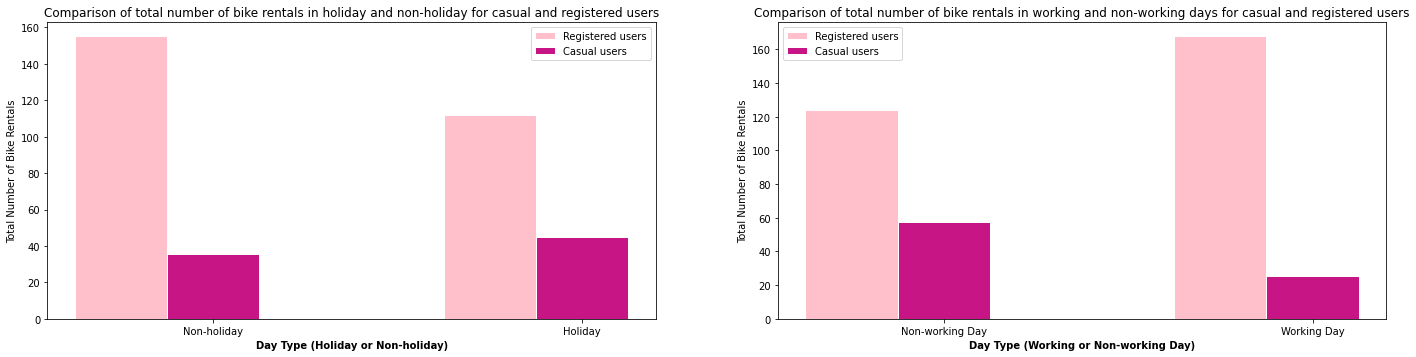

In [159]:
plt.figure(figsize=(24,12))
plt.subplot(2, 2, 1)
barWidth = 0.25
bars1 = data.groupby(['holiday'])['registered'].mean()
bars2 = data.groupby(['holiday'])['casual'].mean()
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='pink', width=barWidth, edgecolor='white', label='Registered users')
plt.bar(r2, bars2, color='mediumvioletred', width=barWidth, edgecolor='white', label='Casual users')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Non-holiday', 'Holiday'])
plt.title('Comparison of total number of bike rentals in holiday and non-holiday for casual and registered users')
plt.xlabel('Day Type (Holiday or Non-holiday)')
plt.ylabel('Total Number of Bike Rentals')
plt.legend()



plt.subplot(2, 2, 2)
barWidth = 0.25
bars1 = data.groupby(['workingday'])['registered'].mean()
bars2 = data.groupby(['workingday'])['casual'].mean()
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='pink', width=barWidth, edgecolor='white', label='Registered users')
plt.bar(r2, bars2, color='mediumvioletred', width=barWidth, edgecolor='white', label='Casual users')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Non-working Day', 'Working Day'])
plt.title('Comparison of total number of bike rentals in working and non-working days for casual and registered users')
plt.xlabel('Day Type (Working or Non-working Day)')
plt.ylabel('Total Number of Bike Rentals')
plt.legend()
plt.show()



- Registered users are higher in non-holiday time as they use the service for going regular places while casual users prefer the service more when it is holiday time as they use rental bikes for recreation activities. 

- The reverse pattern follows for working and non-working day data. Registered users appear more in working days while casual users seems to use the service more in non-working days.

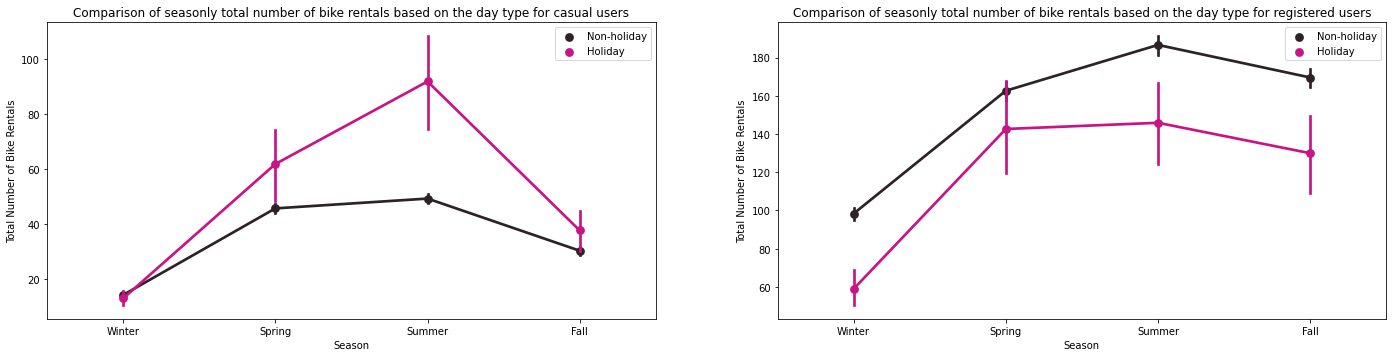

In [160]:
plt.figure(figsize=(24,12))
plt.subplot(2, 2, 1)
holiday_seasonly_cas = sns.pointplot(x='season', y='casual', data=data, hue='holiday', color='mediumvioletred')
holiday_seasonly_cas.set_title('Comparison of seasonly total number of bike rentals based on the day type for casual users')
plt.xlabel('Season')
plt.ylabel('Total Number of Bike Rentals')
legend_handle = holiday_seasonly_cas.get_legend_handles_labels()[0]
holiday_seasonly_cas.legend(legend_handle, ['Non-holiday', 'Holiday'])
holiday_seasonly_cas.set_xticklabels(['Winter','Spring','Summer','Fall'])

plt.subplot(2, 2, 2)
holiday_seasonly_reg = sns.pointplot(x='season', y='registered', data=data, hue='holiday', color='mediumvioletred')
holiday_seasonly_reg.set_title('Comparison of seasonly total number of bike rentals based on the day type for registered users')
plt.xlabel('Season')
plt.ylabel('Total Number of Bike Rentals')
legend_handle = holiday_seasonly_reg.get_legend_handles_labels()[0]
holiday_seasonly_reg.legend(legend_handle, ['Non-holiday', 'Holiday'])
holiday_seasonly_reg.set_xticklabels(['Winter','Spring','Summer','Fall'])
plt.show()

- For the casual users, the graph suggests that, they use rental bike service more when it is holiday compared to non-holiday time as they can have opportunity to travel to places or do outdoor activities. For both type of days, holiday and non-holiday, there is an increase the number of users when it is spring and summer time, as the season and weather condition graphs also indicated earlier, the better weather situation, the more possibility to go out and use rental bike service. 

- For registered users, the graph indicates that the number of people that rent a bike is more when it is not a holiday compared to holiday time. Considering that registered users are mostly local people who prefers rental bike service on a daily basis to go places regularly, they would prefer riding the bike to go to school, office or appoinments during the non-holiday time. And in both day types,  for registered users there is a peak for spring and summer time, due to the sema reason as in casual users. 

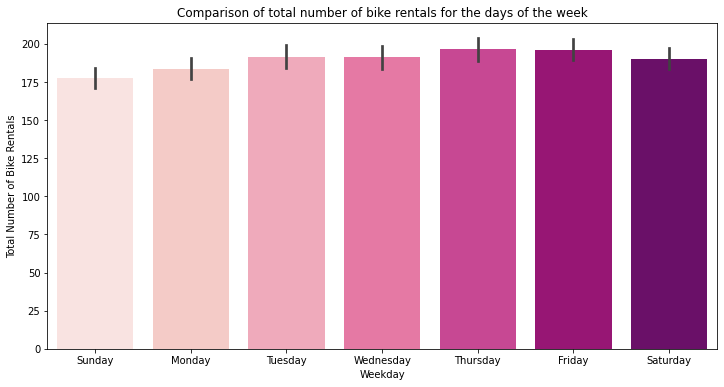

In [168]:
plt.figure(figsize=(12,6))
days = sns.barplot(data=data, x="weekday",y='total_rental', palette='RdPu')
days.set(xlabel ="Weekday", ylabel = "Total Number of Bike Rentals", 
        title ='Comparison of total number of bike rentals for the days of the week',
        xticklabels = (['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']))
plt.show()

The graph indicates that the number of bike rentals in each day of the week doesnt vary much, it is almost constant for all days for all type of users.

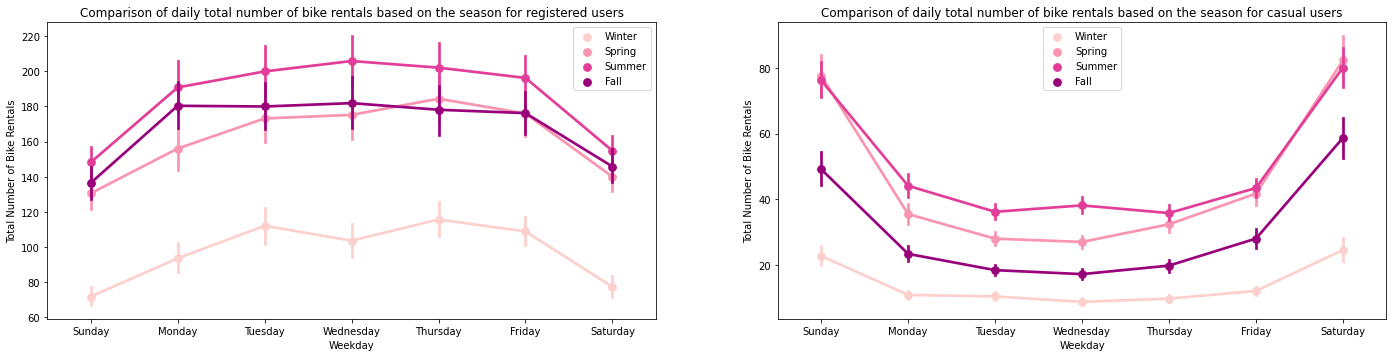

In [162]:
plt.figure(figsize=(24,12))
plt.subplot(2, 2, 1)
weekday_season_reg = sns.pointplot(x='weekday', y='registered', data=data, hue='season', palette="RdPu")
weekday_season_reg.set_title('Comparison of daily total number of bike rentals based on the season for registered users')
weekday_season_reg.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlabel('Weekday')
plt.ylabel('Total Number of Bike Rentals')
legend_handle = weekday_season_reg.get_legend_handles_labels()[0]
weekday_season_reg.legend(legend_handle, ['Winter','Spring','Summer','Fall'])


plt.subplot(2, 2, 2)
weekday_season_cas = sns.pointplot(x='weekday', y='casual', data=data, hue='season', palette="RdPu")
weekday_season_cas.set_title('Comparison of daily total number of bike rentals based on the season for casual users')
weekday_season_cas.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlabel('Weekday')
plt.ylabel('Total Number of Bike Rentals')
legend_handle = weekday_season_cas.get_legend_handles_labels()[0]
weekday_season_cas.legend(legend_handle, ['Winter','Spring','Summer','Fall'])
plt.show()


- For registered users, the count of rental bikes is higher during weekdays showing that registered users follow a regular riding pattern.

- for the casual users, the variation of the number of rental bikes based on the day of the week is high on weekends. However, it is low and almost same for all the weekdays which means casual users might mainly consist of tourists who use rental bike services for local sightseeing and recreation activities.

## 2.5. Effect of The Hours of The Day

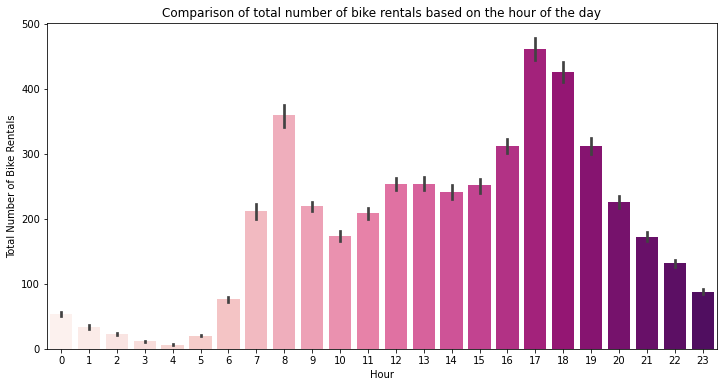

In [169]:
plt.figure(figsize=(12,6))
hours = sns.barplot(data=data, x='hour', y='total_rental', palette='RdPu')
hours.set (title="Comparison of total number of bike rentals based on the hour of the day", 
            xlabel='Hour', ylabel= 'Total Number of Bike Rentals')
plt.show() 

The graph of distribution of the total bike rentals based on the hours of the day indicates that the peak hours are in the morning (7am - 9 am) and in the evening (5pm - 7 pm) as morning peak hours are the times people go to school and work or places on a regular basis while evening peak hours are when people come back their home. T

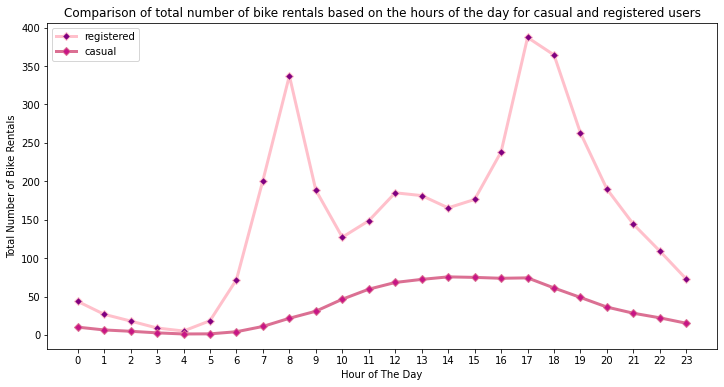

In [132]:
hours_reg = data.groupby(['hour'])['registered'].mean()
hours_cas = data.groupby(['hour'])['casual'].mean()
fig,axes = plt.subplots(figsize=(12, 6), sharex=True)
hours_reg.plot(kind = 'line', marker='D', markerfacecolor='purple', markersize=5, color='pink', linewidth=3)
hours_cas.plot(kind = 'line', marker='D', markerfacecolor='mediumvioletred', markersize=5, color='palevioletred', linewidth=3)
plt.title('Comparison of total number of bike rentals based on the hours of the day for casual and registered users')
plt.legend(loc='upper left')
plt.xlabel('Hour of The Day')
plt.ylabel('Total Number of Bike Rentals')
tick_val=[1,2,3,4,5,6,7,8,9,10,11,12]
tick_lab=['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']

tick_val = []
for x in range(24):
    tick_val.append(x)

plt.setp(axes, xticks=tick_val)
plt.show()

As inline with the earlier graph ***Comparison of total number of bike rentals based on the hour of the day***, registered users have peak hours during the day (morning and evening). However, for casual users, the number of rbike rentals start increasing from the morning on and follow a stable pattern during the day time. Through the evenin, less casual users apper on the bike rental system, as casual users are mainly people who prefer using the rental bike as occasion requires during the day. 

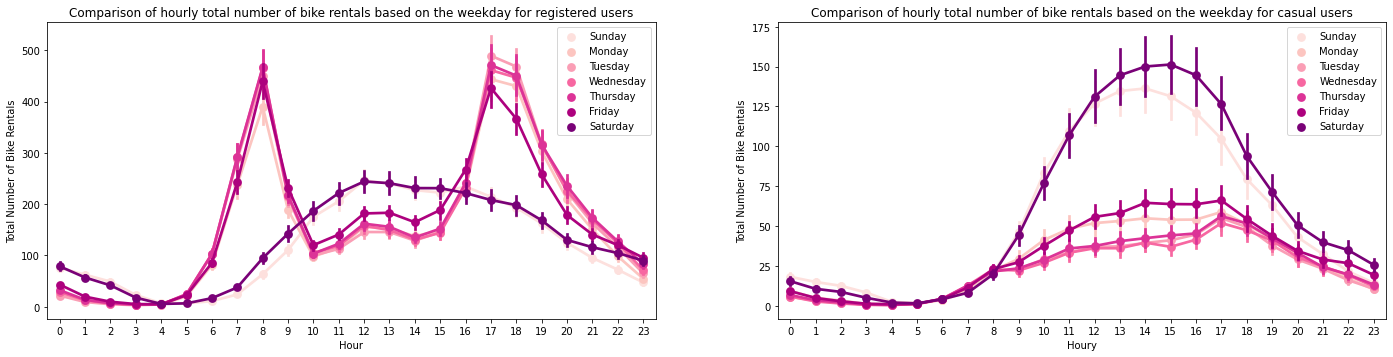

In [163]:
plt.figure(figsize=(24,12))
plt.subplot(2, 2, 1)
hourly_weekday_reg = sns.pointplot(x='hour', y='registered', data=data, hue='weekday', palette="RdPu")
hourly_weekday_reg.set_title('Comparison of hourly total number of bike rentals based on the weekday for registered users')
plt.xlabel('Hour')
plt.ylabel('Total Number of Bike Rentals')
legend_handle = hourly_weekday_reg.get_legend_handles_labels()[0]
hourly_weekday_reg.legend(legend_handle, ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])


plt.subplot(2, 2, 2)
hourly_weekday_cas = sns.pointplot(x='hour', y='casual', data=data, hue='weekday', palette="RdPu")
hourly_weekday_cas.set_title('Comparison of hourly total number of bike rentals based on the weekday for casual users')
plt.xlabel('Houry')
plt.ylabel('Total Number of Bike Rentals')
legend_handle = hourly_weekday_cas.get_legend_handles_labels()[0]
hourly_weekday_cas.legend(legend_handle, ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

- As observed before, registered users have a regular pattern that they have peak hours in the morning and evening. However, they have more stable pattern on weekend, probably they use the service for social activities outside.

- Casual users have high number of rental bikes on weekend as they are mostly people consits of tourists and local people that use the service for going to places based on the situation (e.g meeting with friends, going to cinema) 


## 2.6. Multi-Collinearity

We drop the irrelavant data which are ID and Date, as well as higly correlated values feeling_temp, month, casual and registered.

In [170]:
data.drop('id',axis=1,inplace=True)
data.drop('feeling_temp', axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)
data.drop('registered', axis=1, inplace=True)
data.drop('casual', axis=1, inplace=True)
data.drop('month', axis=1, inplace=True)

In [171]:
data.corr()

,season,year,hour,holiday,weekday,workingday,weather,humidity,total_rental,temperature,windspeed
season,1.000000,-0.010742,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.150625,0.178056,0.312025,-0.149773
year,-0.010742,1.000000,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,-0.083546,0.250495,0.040913,-0.008740
hour,-0.006117,-0.003867,1.000000,0.000479,-0.003498,0.002285,-0.020203,-0.276498,0.394071,0.137603,0.137252
holiday,-0.009585,0.006692,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.010588,-0.030927,-0.027340,0.003988
weekday,-0.002335,-0.004485,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.037158,0.026900,-0.001795,0.011502
workingday,0.013743,-0.002196,0.002285,-0.252471,0.035955,1.000000,0.044672,0.015688,0.030284,0.055390,-0.011830
weather,-0.014524,-0.019157,-0.020203,-0.017036,0.003311,0.044672,1.000000,0.418130,-0.142426,-0.102640,0.026226
humidity,0.150625,-0.083546,-0.276498,-0.010588,-0.037158,0.015688,0.418130,1.000000,-0.322911,-0.069881,-0.290105
total_rental,0.178056,0.250495,0.394071,-0.030927,0.026900,0.030284,-0.142426,-0.322911,1.000000,0.404772,0.093234
temperature,0.312025,0.040913,0.137603,-0.027340,-0.001795,0.055390,-0.102640,-0.069881,0.404772,1.000000,-0.023125


<AxesSubplot:>

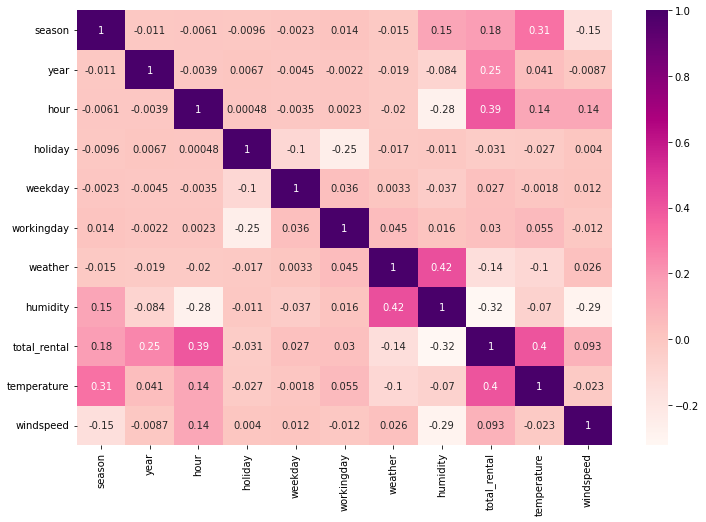

In [172]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="RdPu")

## 2.7. Conclusion

1. Casual and registered users have a different pattern of using the bike rental service.
2. Registered users have a peak time in the morning and evening while casual users have increasing activity from the early morning time on and remain almost stable during the day. 
3. Considering the pattern during the days, registered users might be mostly office or school commuters whereas casual users may be tourists and local people having outdoor activities. This idea is derived based on the assumption. To find out more, we would need a different dataset to indentify the origin of the users.
4. Activity level is higher in weekdays for registered users while casual users appear to be more active in weekends.
5. The number of registered users using the service is higher in working days (also in non-holiday time) compared to the casual users.
6. Casual users prefer the service more when it is holiday or non-working day. 
7. Both casual and registered users prefer better weather conditions such as warm weather, convenient humidity, low windspeed and clear sky for using the rental bike service.
8. Among the seasons, both users prefer summer time as the weather conditions are more convenient for riding a bike.

# 3. Prediction Model Building

Applying one-hot encoding to the categorical variables.

In [173]:
data = pd.get_dummies(data)

Splitting the dataset into train and test (75% -25%). Train dataset is for building the prediction model and the test dataset is for evaluation purposes.

In [174]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('total_rental', axis=1), data.total_rental, test_size=0.25, random_state=5)

Getting the RMSE values for train and test datset

In [175]:
 
rf = RandomForestRegressor().fit(X_train, y_train)
print(np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

16.94676265069098
44.44560924691352
